In [4]:
import pandas as pd
from tqdm import tqdm

## 데이터 불러오기

In [5]:
df = pd.read_csv('../data/data2030.csv')
df

,Unnamed: 0,Title,Date,ID,Comment,Comment_date,Channel,Like,Dislike,Comment_like
0,0,#139​ 민주당 지도부가 2030 마음을 얻으려면...,2021-04-08,샤인디케이,"내리막이 있으면 다시 오르막이 있는 법, 예방주사라 생각하고 힘들 냅시다.",2021-04-10,박시영TV,6.4천,83,48
1,1,#139​ 민주당 지도부가 2030 마음을 얻으려면...,2021-04-08,문동렬,2030마음을 얻으려면 조언을 2030을 모셔다가 들어보는 성의를 보여야 됩니다. ...,2021-04-10,박시영TV,6.4천,83,37
2,2,#139​ 민주당 지도부가 2030 마음을 얻으려면...,2021-04-08,135 swan,전 군대 전역 전까지는 보수를 지지했지만 대학에서 양극화에 관심을 가지면서 진보로 ...,2021-04-10,박시영TV,6.4천,83,34
3,3,#139​ 민주당 지도부가 2030 마음을 얻으려면...,2021-04-08,미루,몸 안에서 무엇인가 무너져 내린 기분..그래도 힘내고 가야죠민주당은 뼈아픈 진단 새...,2021-04-10,박시영TV,6.4천,83,67
4,4,#139​ 민주당 지도부가 2030 마음을 얻으려면...,2021-04-08,단아란,네 죄송합니다. 삭제하겠습니다,2021-04-10,박시영TV,6.4천,83,34
...,...,...,...,...,...,...,...,...,...,...
56824,48635,"[정치 맞수다] 대선가도 들어선 여·야의 서로 다른 잡음, 20대 남자 투표성향에 ...",2021-04-11,유창준,"간교한 인간성을 가진, 김종인, 안띨수를 섬기느니.. 죽는게 났다.",2021-04-17,MBCNEWS,615,88,1
56825,48636,"[정치 맞수다] 대선가도 들어선 여·야의 서로 다른 잡음, 20대 남자 투표성향에 ...",2021-04-11,유정순,이준석 정치연륜이 뭐가있다고 이렇게 나와서 이야기를 많이 하고 다니나,2021-04-17,MBCNEWS,615,88,0
56826,48637,"[정치 맞수다] 대선가도 들어선 여·야의 서로 다른 잡음, 20대 남자 투표성향에 ...",2021-04-11,Hannah Kim,준석아 주댕이 조심해라.안철수가 할말이 옳다. 단일화 못햇우면 오세훈 승라없엇다. ...,2021-04-17,MBCNEWS,615,88,0
56827,48638,"[정치 맞수다] 대선가도 들어선 여·야의 서로 다른 잡음, 20대 남자 투표성향에 ...",2021-04-11,박계순,김준석 아웃 밉상,2021-04-17,MBCNEWS,615,88,0


In [6]:
df_w = df['Comment']
df_w

0                내리막이 있으면 다시 오르막이 있는 법, 예방주사라 생각하고 힘들 냅시다.
1        2030마음을 얻으려면 조언을 2030을 모셔다가 들어보는 성의를 보여야 됩니다. ...
2        전 군대 전역 전까지는 보수를 지지했지만 대학에서 양극화에 관심을 가지면서 진보로 ...
3        몸 안에서 무엇인가 무너져 내린 기분..그래도 힘내고 가야죠민주당은 뼈아픈 진단 새...
4                                         네 죄송합니다. 삭제하겠습니다
                               ...                        
56824              간교한 인간성을 가진,  김종인, 안띨수를 섬기느니..  죽는게 났다.
56825               이준석 정치연륜이 뭐가있다고 이렇게 나와서 이야기를 많이 하고 다니나
56826    준석아 주댕이 조심해라.안철수가 할말이 옳다. 단일화 못햇우면 오세훈 승라없엇다. ...
56827                                           김준석  아웃 밉상
56828                    토론자가 없어서 양문석, 이준석을 부르냐???한심하네~!!!
Name: Comment, Length: 56829, dtype: object

In [7]:
import re

# 텍스트 정제 함수 
def text_cleaning(text):
    # 한글 정규식 정의(띄어쓰기, ㄱ~ㅣ, 가~힣)
    hangul = re.compile('[^ ㄱ-ㅣ가-힣0-9a-zA-Z?!.,]+')
    # 정제한다(정규식에 해당하지 않는 문자는 길이가 0인 문자열로 변환한다)
    result = hangul.sub('', text)
    return result

In [8]:
df_w = df_w.apply(lambda x : text_cleaning(x))

In [9]:
# data 나누기
df_w1 = df_w[:5683]
df_w2 = df_w[5683:11366]
df_w3 = df_w[11366:17049]
df_w4 = df_w[17049:22732]
df_w5 = df_w[22732:28415]
df_w6 = df_w[28415:34098]
df_w7 = df_w[34098:39781]
df_w8 = df_w[39781:45464]
df_w9 = df_w[45464:51147]
df_w10 = df_w[51147:]

## 데이터 전처리
- 1. 명사분석
- 2. 형용사분석
- 3. 동사분석

### 1. 명사분석

In [10]:
# 형태소 분석
from konlpy.tag import Okt

# 명사
def get_pos_noun(x) :
    tagger = Okt() # Okt로 형태소 분리하기
    pos = tagger.pos(x) 
    noun_list = []
    for i in pos:
        if i[1] == 'Noun':
#             print(i[0], i[1])
            noun_list.append(i[0])
    return noun_list

In [11]:
nouns1 = df_w1.apply(lambda x : get_pos_noun(x))
nouns2 = df_w2.apply(lambda x : get_pos_noun(x))
nouns3 = df_w3.apply(lambda x : get_pos_noun(x))
nouns4 = df_w4.apply(lambda x : get_pos_noun(x))
nouns5 = df_w5.apply(lambda x : get_pos_noun(x))
nouns6 = df_w6.apply(lambda x : get_pos_noun(x))
nouns7 = df_w7.apply(lambda x : get_pos_noun(x))
nouns8 = df_w8.apply(lambda x : get_pos_noun(x))
nouns9 = df_w9.apply(lambda x : get_pos_noun(x))
nouns10 = df_w10.apply(lambda x : get_pos_noun(x))

In [12]:
list_nouns1 = []
for n in nouns1 :
#     print(n)
    for x in n :
        list_nouns1.append(x)
        
list_nouns2 = []
for n in nouns2 :
#     print(n)
    for x in n :
        list_nouns2.append(x)
        
list_nouns3 = []
for n in nouns3 :
#     print(n)
    for x in n :
        list_nouns3.append(x)
        
list_nouns4 = []
for n in nouns4 :
#     print(n)
    for x in n :
        list_nouns4.append(x)
        
list_nouns5 = []
for n in nouns5 :
#     print(n)
    for x in n :
        list_nouns5.append(x)
        
list_nouns6 = []
for n in nouns6 :
#     print(n)
    for x in n :
        list_nouns6.append(x)
        
list_nouns7 = []
for n in nouns7 :
#     print(n)
    for x in n :
        list_nouns7.append(x)
        
list_nouns8 = []
for n in nouns8 :
#     print(n)
    for x in n :
        list_nouns8.append(x)
        
list_nouns9 = []
for n in nouns9 :
#     print(n)
    for x in n :
        list_nouns9.append(x)
        
list_nouns10 = []
for n in nouns10 :
#     print(n)
    for x in n :
        list_nouns10.append(x)

In [13]:
# 전체 갯수
nouns_all = list_nouns1 + list_nouns2 +list_nouns3 + list_nouns4 +list_nouns5 + list_nouns6 +list_nouns7 + list_nouns8 + list_nouns9 + list_nouns10
len(nouns_all)

704736

In [14]:
# 한 글자 제거
nouns_words = []
for n in nouns_all :
    if len(n) > 1 :
        nouns_words.append(n)
nouns_words

['내리막',
 '다시',
 '오르막',
 '예방주사',
 '생각',
 '마음',
 '조언',
 '성의',
 '사람',
 '추측',
 '마음',
 '이야기',
 '자체',
 '의식',
 '아마추어',
 '사람',
 '몇번',
 '실질',
 '생각',
 '군대',
 '전역',
 '보수',
 '지지',
 '대학',
 '양극화',
 '관심',
 '진보',
 '대의',
 '경우',
 '성격',
 '중반',
 '공략',
 '생각',
 '가령',
 '초반',
 '등록금',
 '문제',
 '라면',
 '중반',
 '취업',
 '후반',
 '자산',
 '형성',
 '고민',
 '고민',
 '흔적',
 '생각',
 '정당',
 '색채',
 '이유',
 '정당',
 '경우',
 '무엇',
 '기분',
 '가야',
 '민주당',
 '진단',
 '황희두',
 '자주',
 '남성',
 '마음',
 '방안',
 '모색',
 '국민',
 '재난',
 '원금',
 '보편',
 '지급',
 '언론',
 '개혁',
 '삭제',
 '진짜',
 '민주당',
 '제대로',
 '각성',
 '대권',
 '대표',
 '후보',
 '모양',
 '말씀',
 '관련',
 '정책',
 '입안',
 '그거',
 '홍보',
 '우리',
 '커뮤니티',
 '대응',
 '홍보',
 '하라',
 '커뮤니티',
 '중독',
 '진짜',
 '청와대',
 '홍보',
 '마케팅',
 '전문가',
 '커뮤니티',
 '공략',
 '래야',
 '지지자',
 '퍼날르',
 '포탈',
 '유튜브',
 '적극',
 '활용',
 '제발',
 '법안',
 '정책',
 '홍보',
 '진정',
 '커뮤니티',
 '관심',
 '가지',
 '말씀',
 '해주시',
 '대표',
 '추천',
 '노력',
 '하라',
 '소통',
 '제발',
 '개혁',
 '좀해',
 '지난',
 '짓거리',
 '수도',
 '정말',
 '저리',
 '민주당',
 '자만',
 '국민',
 '소통',
 '핑계',
 '거리',
 '시오',
 '지금',
 '당장',
 '당내

In [15]:
# 불용어 제거
with open('../data/불용어/politics_stopwords_nouns.txt', encoding='utf-8') as fp :
    stopwords = fp.readlines()

# \n 제거
stopwords = [x.strip() for x in stopwords]

remove_nouns_words = []
for key in nouns_words :
    # 현재 글자가 불용어에 포함되어 있지 않다면..
    if key not in stopwords :
        remove_nouns_words.append(key)        

In [16]:
# 개수
from collections import Counter
nouns_count = Counter(remove_nouns_words)  

### 2. 형용사분석

In [17]:
# 형태소 분석
from konlpy.tag import Okt

# 명사
def get_pos_adjective(x) :
    tagger = Okt() # Okt로 형태소 분리하기
    pos = tagger.pos(x) 
    adjective_list = []
    for i in pos:
        if i[1] == 'Adjective':
#             print(i[0], i[1])
            adjective_list.append(i[0])
    return adjective_list

In [18]:
adjective1 = df_w1.apply(lambda x : get_pos_adjective(x))
adjective2 = df_w2.apply(lambda x : get_pos_adjective(x))
adjective3 = df_w3.apply(lambda x : get_pos_adjective(x))
adjective4 = df_w4.apply(lambda x : get_pos_adjective(x))
adjective5 = df_w5.apply(lambda x : get_pos_adjective(x))
adjective6 = df_w6.apply(lambda x : get_pos_adjective(x))
adjective7 = df_w7.apply(lambda x : get_pos_adjective(x))
adjective8 = df_w8.apply(lambda x : get_pos_adjective(x))
adjective9 = df_w9.apply(lambda x : get_pos_adjective(x))
adjective10 = df_w10.apply(lambda x : get_pos_adjective(x))

In [19]:
list_adjective1 = []
for n in adjective1 :
#     print(n)
    for x in n :
        list_adjective1.append(x)
        
list_adjective2 = []
for n in adjective2 :
#     print(n)
    for x in n :
        list_adjective2.append(x)
        
list_adjective3 = []
for n in adjective3 :
#     print(n)
    for x in n :
        list_adjective3.append(x)
        
list_adjective4 = []
for n in adjective4 :
#     print(n)
    for x in n :
        list_adjective4.append(x)
        
list_adjective5 = []
for n in adjective5 :
#     print(n)
    for x in n :
        list_adjective5.append(x)
        
list_adjective6 = []
for n in adjective6 :
#     print(n)
    for x in n :
        list_adjective6.append(x)
        
list_adjective7 = []
for n in adjective7 :
#     print(n)
    for x in n :
        list_adjective7.append(x)
        
list_adjective8 = []
for n in adjective8 :
#     print(n)
    for x in n :
        list_adjective8.append(x)
        
list_adjective9 = []
for n in adjective9 :
#     print(n)
    for x in n :
        list_adjective9.append(x)
        
list_adjective10 = []
for n in adjective10 :
#     print(n)
    for x in n :
        list_adjective10.append(x)

In [20]:
# 전체 갯수
adjective_all = list_adjective1 + list_adjective2 +list_adjective3 + list_adjective4 +list_adjective5 + list_adjective6 +list_adjective7 + list_adjective8 + list_adjective9 + list_adjective10
len(adjective_all)

99728

In [21]:
# 한 글자 제거
adjective_words = []
for n in adjective_all :
    if len(n) > 1 :
        adjective_words.append(n)

In [22]:
# 불용어 제거
with open('../data/불용어/politics_stopwords_adjective.txt', encoding='utf-8') as fp :
    stopwords = fp.readlines()

# \n 제거
stopwords = [x.strip() for x in stopwords]

remove_adjective_words = []
for key in adjective_words :
    # 현재 글자가 불용어에 포함되어 있지 않다면..
    if key not in stopwords :
        remove_adjective_words.append(key)


In [23]:
# 개수
from collections import Counter
adjective_count = Counter(remove_adjective_words)  

### 3. 동사분석

In [24]:
# 형태소 분석
from konlpy.tag import Okt

# 명사
def get_pos_verb(x) :
    tagger = Okt() # Okt로 형태소 분리하기
    pos = tagger.pos(x) 
    verb_list = []
    for i in pos:
        if i[1] == 'Verb':
#             print(i[0], i[1])
            verb_list.append(i[0])
    return verb_list

In [25]:
verb1 = df_w1.apply(lambda x : get_pos_verb(x))
verb2 = df_w2.apply(lambda x : get_pos_verb(x))
verb3 = df_w3.apply(lambda x : get_pos_verb(x))
verb4 = df_w4.apply(lambda x : get_pos_verb(x))
verb5 = df_w5.apply(lambda x : get_pos_verb(x))
verb6 = df_w6.apply(lambda x : get_pos_verb(x))
verb7 = df_w7.apply(lambda x : get_pos_verb(x))
verb8 = df_w8.apply(lambda x : get_pos_verb(x))
verb9 = df_w9.apply(lambda x : get_pos_verb(x))
verb10 = df_w10.apply(lambda x : get_pos_verb(x))

In [26]:
list_verb1 = []
for n in verb1 :
#     print(n)
    for x in n :
        list_verb1.append(x)
        
list_verb2 = []
for n in verb2 :
#     print(n)
    for x in n :
        list_verb2.append(x)
        
list_verb3 = []
for n in verb3 :
#     print(n)
    for x in n :
        list_verb3.append(x)
        
list_verb4 = []
for n in verb4 :
#     print(n)
    for x in n :
        list_verb4.append(x)
        
list_verb5 = []
for n in verb5 :
#     print(n)
    for x in n :
        list_verb5.append(x)
        
list_verb6 = []
for n in verb6 :
#     print(n)
    for x in n :
        list_verb6.append(x)
        
list_verb7 = []
for n in verb7 :
#     print(n)
    for x in n :
        list_verb7.append(x)
        
list_verb8 = []
for n in verb8 :
#     print(n)
    for x in n :
        list_verb8.append(x)
        
list_verb9 = []
for n in verb9 :
#     print(n)
    for x in n :
        list_verb9.append(x)
        
list_verb10 = []
for n in verb10 :
#     print(n)
    for x in n :
        list_verb10.append(x)

In [27]:
# 전체 갯수
verb_all = list_verb1 + list_verb2 +list_verb3 + list_verb4 +list_verb5 + list_verb6 +list_verb7 + list_verb8 + list_verb9 + list_verb10
len(verb_all)

235221

In [28]:
# 한 글자 제거
verb_words = []
for n in verb_all :
    if len(n) > 1 :
        verb_words.append(n)

In [29]:
# 불용어 제거
with open('../data/불용어/politics_stopwords_verb.txt', encoding='utf-8') as fp :
    stopwords = fp.readlines()

# \n 제거
stopwords = [x.strip() for x in stopwords]

remove_verb_words = []
for key in verb_words :
    # 현재 글자가 불용어에 포함되어 있지 않다면..
    if key not in stopwords :
        remove_verb_words.append(key)

In [30]:
# 개수
from collections import Counter
verb_count = Counter(remove_verb_words)  

## 결과
- 1. 명사결과
- 2. 형용사결과
- 3. 동사결과

In [31]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import platform

if platform.system() == 'Windows':  
    font_path = "c:/Windows/Fonts/malgun.ttf"
else:
    pass

### 1.명사결과
- 1-1. 명사 빈출단어
- 1-2. 명사 워드클라우드

1-1. 명사 빈출단어

In [32]:
# 빈출단어 500개
nouns_top500 = nouns_count.most_common(500) #500개

# 딕셔너리 전환
nouns_dict_top500 = {}
for x,y  in nouns_top500 :
    nouns_dict_top500[x] = y
    
nouns_dict_top500

{'민주당': 7823,
 '페미': 5457,
 '사람': 5265,
 '국민': 5162,
 '생각': 5159,
 '여성': 4678,
 '남자': 4341,
 '남성': 3975,
 '지금': 3267,
 '보수': 2916,
 '나라': 2884,
 '오세훈': 2644,
 '세대': 2601,
 '정치': 2544,
 '투표': 2519,
 '문제': 2480,
 '여자': 2480,
 '선거': 2330,
 '정책': 2302,
 '정권': 2283,
 '진보': 2245,
 '지지': 2229,
 '청년': 2193,
 '정부': 2036,
 '대통령': 2029,
 '문재인': 1940,
 '사회': 1857,
 '언론': 1835,
 '대한민국': 1615,
 '부동산': 1608,
 '이유': 1582,
 '보고': 1505,
 '개혁': 1466,
 '대가': 1399,
 '박영선': 1390,
 '대선': 1374,
 '후보': 1336,
 '영상': 1259,
 '정신': 1213,
 '지지율': 1199,
 '대한': 1171,
 '조국': 1146,
 '페미니즘': 1107,
 '소리': 1066,
 '결과': 1055,
 '국힘': 1040,
 '미래': 989,
 '정도': 987,
 '서울': 933,
 '의원': 933,
 '왕토': 932,
 '인간': 916,
 '한국': 914,
 '화이팅': 908,
 '주식': 902,
 '방송': 901,
 '뉴스': 890,
 '역사': 884,
 '응원': 863,
 '국가': 863,
 '시장': 862,
 '남녀': 861,
 '이해': 851,
 '갈등': 851,
 '세상': 842,
 '좌파': 819,
 '얘기': 806,
 '코로나': 789,
 '시민': 787,
 '평등': 777,
 '군대': 770,
 '정당': 769,
 '일베': 753,
 '정치인': 748,
 '말씀': 744,
 '검찰': 743,
 '사실': 738,
 '시작': 732,
 '여당

In [33]:
# 빈출단어 10개
nouns_dict_top10 = nouns_count.most_common(10)
nouns_dict_top10

[('민주당', 7823),
 ('페미', 5457),
 ('사람', 5265),
 ('국민', 5162),
 ('생각', 5159),
 ('여성', 4678),
 ('남자', 4341),
 ('남성', 3975),
 ('지금', 3267),
 ('보수', 2916)]

1-2. 명사 워드클라우드

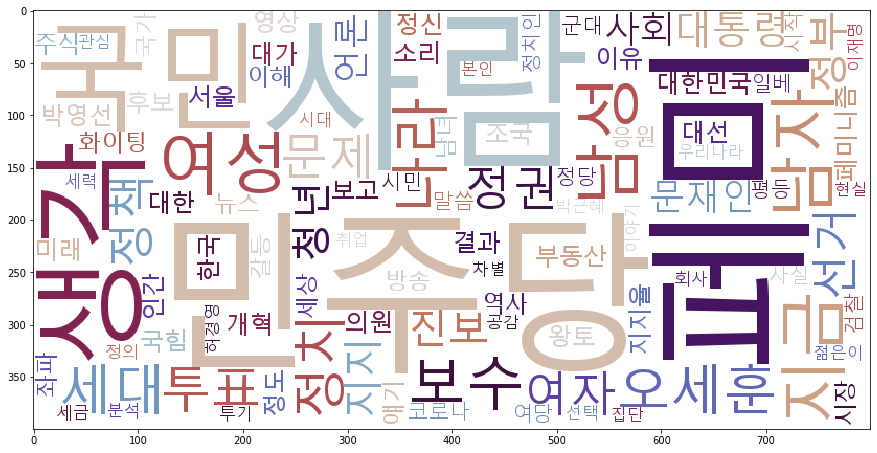

In [34]:
nouns_wordcloud = WordCloud(font_path = font_path,
                     stopwords=stopwords,
                     colormap = 'twilight',
                     background_color='white',
                     max_words=100,
                     relative_scaling=0.1,   
                     width=800,
                     height=400
                     ).generate(' '.join(nouns_dict_top500))

plt.figure(figsize=(15,10))  
plt.imshow(nouns_wordcloud) 

### 2.형용사결과
- 2-1. 형용사 빈출단어
- 2-2. 형용사 워드클라우드

2-1. 형용사 빈출단어

In [35]:
# 빈출단어 500개
adjective_top500 = adjective_count.most_common(500)

# 딕셔너리 전환
adjective_dict_top500 = {}
for x,y  in adjective_top500 :
    adjective_dict_top500[x] = y
    
adjective_dict_top500

{'좋은': 1029,
 '미친': 246,
 '나쁜': 225,
 '좋아서': 205,
 '좋아요': 204,
 '힘든': 180,
 '고맙습니다': 173,
 '싫어서': 150,
 '멋진': 134,
 '무능한': 132,
 '싫다': 117,
 '더러운': 103,
 '힘들게': 93,
 '좋아하는': 91,
 '멍청한': 87,
 '똑똑하고': 87,
 '한심한': 81,
 '시원하게': 78,
 '좋습니다': 78,
 '힘들고': 76,
 '싫어하는': 70,
 '훌륭한': 70,
 '어려운': 69,
 '한심하다': 68,
 '대단한': 68,
 '싫고': 66,
 '행복한': 65,
 '싫어': 62,
 '힘들어': 61,
 '좋다고': 59,
 '싫어요': 59,
 '좋고': 58,
 '어렵게': 56,
 '시원합니다': 56,
 '힘든데': 55,
 '무서운': 54,
 '역겨운': 54,
 '든든합니다': 53,
 '역겹다': 51,
 '힘들': 50,
 '편하게': 50,
 '좋겠어요': 49,
 '자랑스러운': 49,
 '재밌게': 49,
 '쉬운': 48,
 '현명한': 48,
 '좋을': 47,
 '아름답고': 47,
 '싫다고': 46,
 '자유롭게': 46,
 '답답하다': 42,
 '아니꼽게': 42,
 '빠른': 41,
 '미친듯이': 41,
 '재밌는': 40,
 '답답한': 39,
 '멋져요': 38,
 '자랑스럽습니다': 38,
 '자랑스럽다': 37,
 '정당한': 37,
 '불쌍한': 37,
 '망하는': 36,
 '착한': 36,
 '강력하게': 36,
 '불리한': 36,
 '무서워서': 35,
 '실패한': 35,
 '쓸데없는': 35,
 '싫은': 35,
 '시원하다': 35,
 '안타깝습니다': 35,
 '천박한': 35,
 '싫은데': 35,
 '중요하다': 33,
 '평범한': 33,
 '안되': 33,
 '안타까운': 33,
 '심한': 33,
 '안타깝다': 33,
 '어리석은': 33,
 '똑같다':

In [36]:
# 빈출단어 10개
adjective_dict_top10 = adjective_count.most_common(10)
adjective_dict_top10

[('좋은', 1029),
 ('미친', 246),
 ('나쁜', 225),
 ('좋아서', 205),
 ('좋아요', 204),
 ('힘든', 180),
 ('고맙습니다', 173),
 ('싫어서', 150),
 ('멋진', 134),
 ('무능한', 132)]

2-2. 형용사 워드클라우드

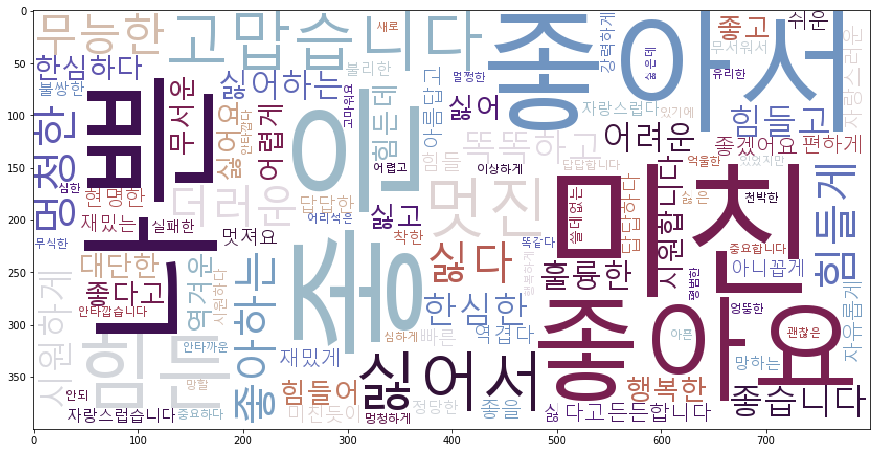

In [37]:
adjective_wordcloud = WordCloud(font_path = font_path,
                     stopwords=stopwords,
                     colormap = 'twilight',
                     background_color='white',
                     max_words=100,
                     relative_scaling=0.1,   
                     width=800,
                     height=400
                     ).generate(' '.join(adjective_dict_top500))

plt.figure(figsize=(15,10))  
plt.imshow(adjective_wordcloud) 

### 3.동사결과
- 3-1. 동사 빈출단어
- 3-2. 동사 워드클라우드

3-1. 동사 빈출단어

In [38]:
# 빈출단어 500개
verb_top500 = verb_count.most_common(500)

# 딕셔너리 전환
verb_dict_top500 = {}
for x,y  in verb_top500 :
    verb_dict_top500[x] = y
    
verb_dict_top500

{'감사합니다': 992,
 '바랍니다': 345,
 '뽑아': 272,
 '듣고': 265,
 '쉽게': 255,
 '받는': 253,
 '받은': 241,
 '만든': 239,
 '찍어': 227,
 '주세요': 215,
 '주고': 212,
 '뽑은': 201,
 '쓰고': 193,
 '뽑을': 185,
 '믿고': 181,
 '버리고': 181,
 '아는': 178,
 '때려': 168,
 '찍은': 160,
 '뽑는': 159,
 '힘내세요': 155,
 '맞습니다': 146,
 '시켜': 144,
 '악물고': 141,
 '놓고': 140,
 '만드는': 138,
 '떠나서': 134,
 '몰아': 129,
 '갖고': 128,
 '바란다': 122,
 '쓰는': 121,
 '뽑는다': 120,
 '마시고': 116,
 '보이는': 114,
 '몰라서': 114,
 '몰라': 110,
 '찍는': 109,
 '지키기': 106,
 '썩은': 106,
 '깨문': 106,
 '시키는': 103,
 '남은': 102,
 '지켜': 101,
 '돌려': 100,
 '할거': 98,
 '들어서': 98,
 '다니는': 98,
 '뽑으면': 98,
 '않게': 97,
 '찾아': 94,
 '죽어도': 94,
 '더듬어': 93,
 '걸고': 92,
 '내는': 92,
 '몰라도': 92,
 '겪어': 92,
 '받아서': 91,
 '나를': 91,
 '지키는': 90,
 '깨어있는': 89,
 '바꿔': 88,
 '가르기': 88,
 '알아야': 86,
 '뽑고': 85,
 '먹은': 84,
 '찍는다': 84,
 '적은': 83,
 '받아야': 83,
 '끌어': 83,
 '만들어서': 82,
 '빠진': 82,
 '느끼는': 80,
 '뽑는게': 80,
 '맞아': 79,
 '찍고': 79,
 '시켜라': 78,
 '믿습니다': 78,
 '차리고': 78,
 '잡으면': 76,
 '모른다': 76,
 '봐요': 74,
 '모르겠다': 74,
 '아는데':

In [39]:
# 빈출단어 10개
verb_top10 = verb_count.most_common(10)
verb_top10

[('감사합니다', 992),
 ('바랍니다', 345),
 ('뽑아', 272),
 ('듣고', 265),
 ('쉽게', 255),
 ('받는', 253),
 ('받은', 241),
 ('만든', 239),
 ('찍어', 227),
 ('주세요', 215)]

3-2. 동사 워드클라우드

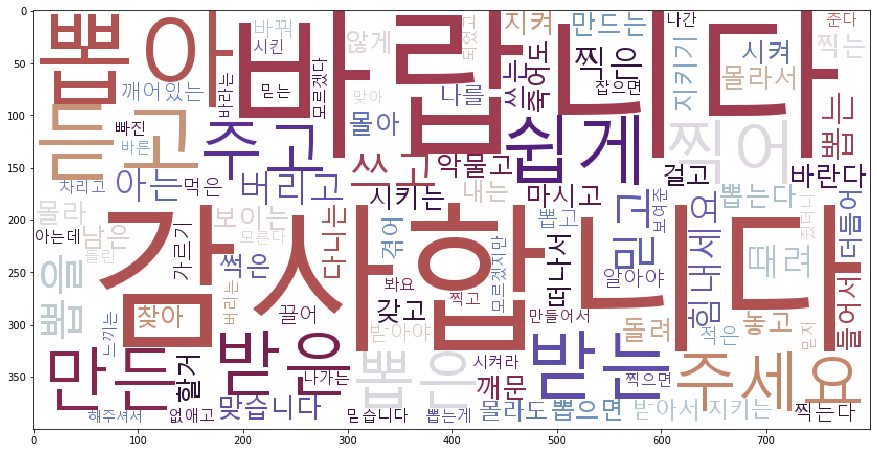

In [40]:
verb_wordcloud = WordCloud(font_path = font_path,
                     stopwords=stopwords,
                     colormap = 'twilight',
                     background_color='white',
                     max_words=100,
                     relative_scaling=0.1,   
                     width=800,
                     height=400
                     ).generate(' '.join(verb_dict_top500))

plt.figure(figsize=(15,10))  
plt.imshow(verb_wordcloud) 